# **WINE CLUSTERING / KÜMELEME**

**Firstly, the dataset named with "*wine-clustering*" in csv format are converted to a Pandas DataFrame. \
\
Öncelikle, csv formatındaki "*wine-clustering*" veri seti Pandas DataFrame'ine dönüştürüldü.**






In [123]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

X = pd.read_csv("/content/wine-clustering.csv")

X.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### **General Information of The DataSet** **/** **Veri Setiyle İlgili Genel Bilgiler**

In [124]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


### **Descriptive Statistics** **/** **Tanımlayıcı İstatistikler**

In [125]:
X.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### **Checking Null Values** **/** **Eksik Veri Kontrolü**

In [126]:
for col in X.columns:
    if not X[X[col].isna()].empty:
        print(col)
else:
    print("There is no columns including null values in The DataSet / Verisetinin hiç bir sütununda eksik veri yok. ")

There is no columns including null values in The DataSet / Verisetinin hiç bir sütununda eksik veri yok. 


### **Outlier Detection** **/** **Aykırı Değerleri Tespit Etme**

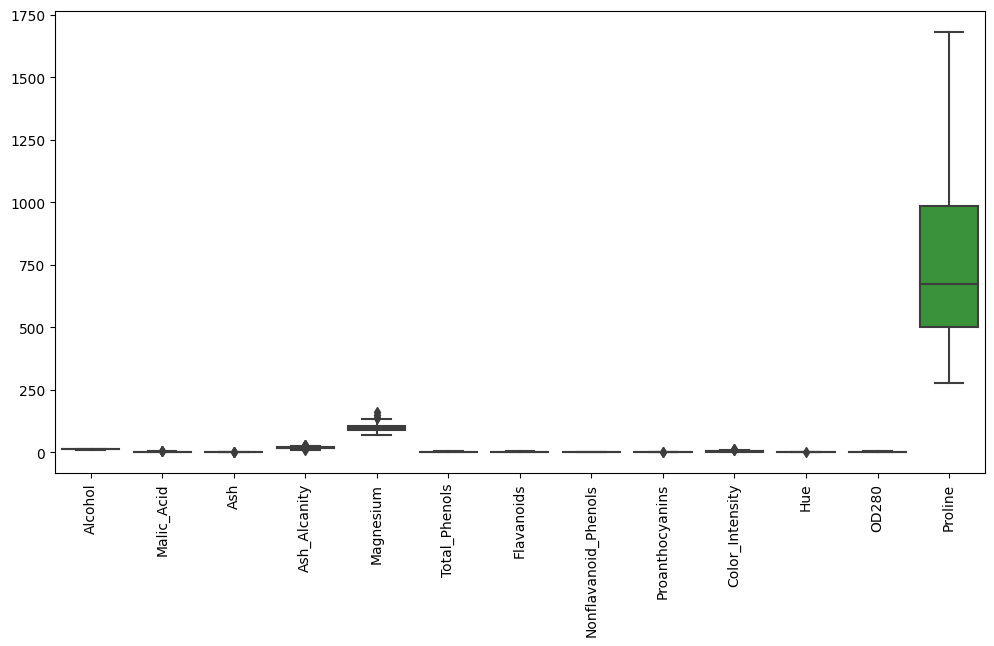

In [127]:
plt.figure(figsize=(12,6))
s = sns.boxplot(data=X, palette=sns.color_palette())
plt.setp(s.get_xticklabels(), rotation=90)
plt.show()

### **Trimming Outliers with Interquartile Range Method** **/** **IQR Yöntemi ile Aykırı Değerleri Kırpma**

In [128]:
Q1, Q3 = X.quantile(0.25), X.quantile(0.75)
IQR = Q3 - Q1

X = X[~((X < (Q1 - 1.5 * IQR)) |(X > (Q3 + 1.5 * IQR))).any(axis=1)]
X.shape

(161, 13)

### **Feature Scaling with Standard Scaler** **/** **Standart Ölçekleyici ile Özellik Ölçekleme**

In [129]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
ScaledX = ss.fit_transform(X)

print(ScaledX)

[[ 1.49571092 -0.57112999  0.27742496 ...  0.37214873  1.82667765
   0.94743557]
 [ 0.20069843 -0.50414451 -0.92862453 ...  0.41815299  1.09101548
   0.90097568]
 [ 0.15040669  0.05087806  1.27553489 ...  0.32614447  0.76562644
   1.31911473]
 ...
 [ 0.28870899  1.88819414 -0.42956957 ... -1.69804288 -1.51209683
   0.23505052]
 [ 0.16297962  0.27097322  0.02789748 ... -1.65203863 -1.42721274
   0.25053715]
 [ 1.36998156  1.71594576  1.56665028 ... -1.60603437 -1.45550744
  -0.61671423]]


### **Conducting Principal Component Analysis** **/** **Temel Bileşen Analizi Uygulama**

In [130]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pcadX = pca.fit_transform(ScaledX)

print(pcadX.shape)

(161, 2)


## **K-Means Algorithm** **/** **K-Ortalama Algoritması**

### **Determining Optimal K Value with Elbow Method** **/** **Dirsek Metodu ile En İyi K Değerini Belirleme**

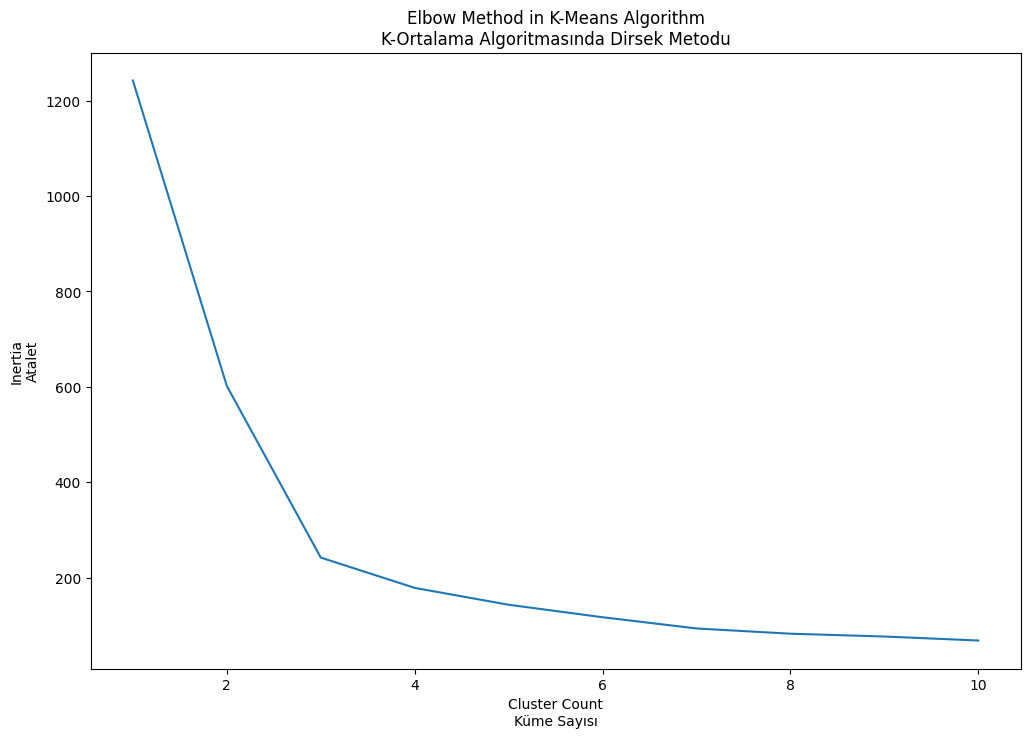

In [131]:
from sklearn.cluster import KMeans

inertias = []  # inertia / atalet
for k in range(1, 11):
    K_Means = KMeans(n_clusters=k, n_init=10).fit(pcadX)
    inertias.append(K_Means.inertia_)

fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=range(1, 11), y=inertias, ax=ax)
ax.set(title='Elbow Method in K-Means Algorithm\nK-Ortalama Algoritmasında Dirsek Metodu',
       xlabel='Cluster Count\nKüme Sayısı',
       ylabel='Inertia\nAtalet')
plt.show()

As indicated in the figure above, the optimal k value at the elbow point is 3.

Yukarıdaki tabloda görüldüğü gibi, dirsek noktasındaki optimal k değeri 3'tür.

In [132]:
elbow = 3

## **THE BEST K-MEANS CLUSTERING MODEL / En İyi K-Ortalama Kümeleme Modeli**

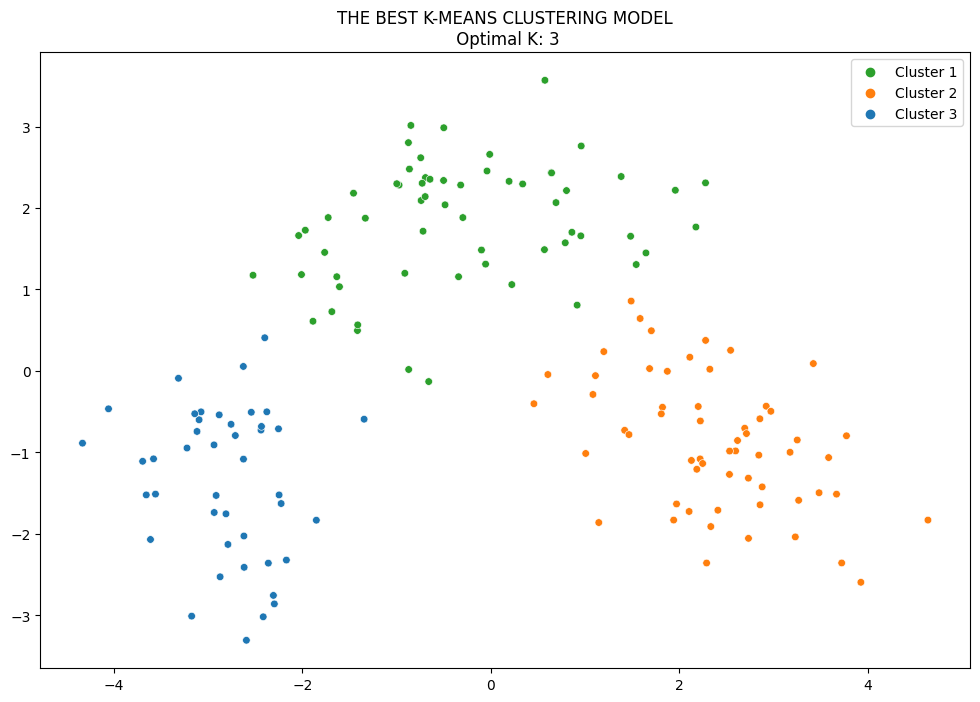

In [133]:
Best_K_Means = KMeans(n_clusters=elbow, n_init=10).fit(pcadX)

ds = np.column_stack((pcadX, Best_K_Means.labels_[:, np.newaxis]))

plt.figure(figsize=(12, 8))
s=sns.scatterplot(x=ds[:, 0], y=ds[:, 1], hue=ds[:, 2],
                  palette=sns.color_palette()[:3], s=30, marker='o', alpha=1)

plt.legend(s.get_legend_handles_labels()[0][::-1], ["Cluster 1","Cluster 2","Cluster 3","Outliers"],
           bbox_to_anchor=(1, 1))

plt.title('THE BEST K-MEANS CLUSTERING MODEL\n Optimal K: %d' % elbow )
plt.show()

In [134]:
from sklearn.metrics import silhouette_score

Best_K_Means_Silhouette = silhouette_score(pcadX, Best_K_Means.labels_)
print('The Silhouette Score of Best K-Means Clustering Model\nEn İyi K-Ortalama Kümeleme Modelinin Silhouette Değeri: ', Best_K_Means_Silhouette)

The Silhouette Score of Best K-Means Clustering Model
En İyi K-Ortalama Kümeleme Modelinin Silhouette Değeri:  0.5720028903237933


## **DBSCAN Algorithm : Density Based Spatial Clustering of Applications with  Noise**
## **Yoğunluğa Dayalı Mekansal Gürültü ile Kümeleme Algoritması**

###**SEARCHING DBSCAN Model with Highest Silhouette Score**
###**En Yüksek Silhouette Değerine Sahip olan DBSCAN Modelini Bulma**

A total of 2500 DBSCAN models have been constructed for 50 different epsilon and 50 different min_samples values.\
\
50 farklı epsilon ve  50 farklı min_samples değeri için toplamda 2500 DBSCAN modeli oluşturulmuştur.

In [135]:
from sklearn.cluster import DBSCAN

silhouettes=[]
for epsi in range(1,50):
  for ms in range(1,50):
    db = DBSCAN(eps=epsi*0.1, min_samples=ms).fit(pcadX)
    if len(set(db.labels_)) > 1:
      silhouettes.append({'epsilon':epsi*0.1, 'min_samples':ms, 'silhouette':silhouette_score(pcadX, db.labels_)})

print('Only %d of them yields meaningful results. Silhouette scores are computed for each of the %d models\n' % (len(silhouettes),len(silhouettes)))
print('Bunlardan yalnızca %d tanesinden anlamlı sonuç elde edilmiştir. %d modelin her biri için silhouette skoru hesaplanmıştır\n\n' % (len(silhouettes),len(silhouettes)))

BestDBSCAN = sorted(silhouettes, key=lambda x: x['silhouette'])[-1]
print("The DBSCAN Model with Highest Silhouette Score\nEn Yüksek Silhouette Değerine Sahip Olan DBSCAN Modeli : ", BestDBSCAN)


Only 342 of them yields meaningful results. Silhouette scores are computed for each of the 342 models

Bunlardan yalnızca 342 tanesinden anlamlı sonuç elde edilmiştir. 342 modelin her biri için silhouette skoru hesaplanmıştır


The DBSCAN Model with Highest Silhouette Score
En Yüksek Silhouette Değerine Sahip Olan DBSCAN Modeli :  {'epsilon': 1.5, 'min_samples': 31, 'silhouette': 0.5665042304782129}


## **THE BEST DBSCAN CLUSTERING MODEL / En İyi DBSCAN Kümeleme Modeli**

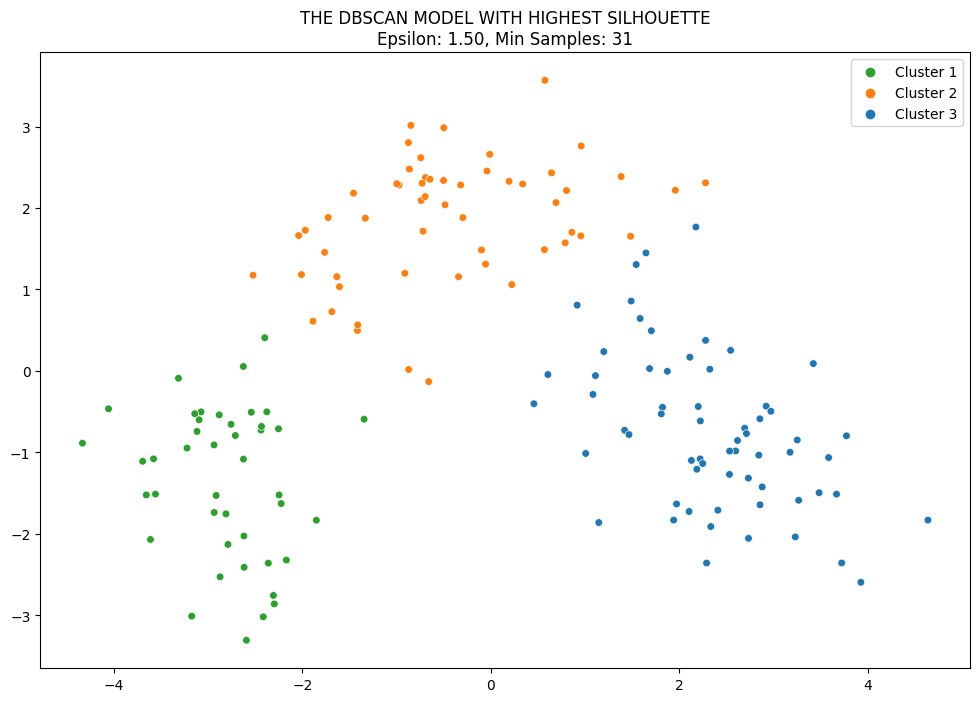

In [122]:
BestDB = DBSCAN(eps=BestDBSCAN['epsilon'], min_samples=BestDBSCAN['min_samples']).fit(pcadX)

ds = np.column_stack((pcadX, BestDB.labels_[:, np.newaxis]))

plt.figure(figsize=(12, 8))
s=sns.scatterplot(x=ds[:, 0], y=ds[:, 1], hue=ds[:, 2],
                  palette=sns.color_palette()[:3], s=30, marker='o', alpha=1)

plt.legend(s.get_legend_handles_labels()[0][::-1], ["Cluster 1","Cluster 2","Cluster 3","Outliers"],
           bbox_to_anchor=(1, 1))

plt.title('THE DBSCAN MODEL WITH HIGHEST SILHOUETTE\nEpsilon: %0.2f, Min Samples: %d'
          % (BestDBSCAN['epsilon'], BestDBSCAN['min_samples']))
plt.show()

As a result, since the Silhouette score for K-means exceeds that of DBSCAN, using K-Means as the clustering algorithm in this study is preferable.\
\
Sonuç olarak, K-Ortalama algoritmasının Silhouette değeri DBSCAN'inkinden daha büyük olduğundan bu çalışmada kümeleme algoritması olarak K-Ortalama algoritmasını kullanmak daha iyi olacaktır.

